# **Mapas y Gráficos 3D**
Luisa Gomez (luisa.gomez@pucp.edu.pe)

## **Objetivos**
- Generar un buscado con DataFrame
- Generar mapas interactivos con Folium
- Generar gráficos 3D con plotly.express

## **Contenido**
 1. Buscador con datos de un DataFrame
 2. Librería Folium
 3. Librería plotly.express


----

## **1. Buscador con datos de un DataFrame**

In [ ]:
### Con este código elegimos el archivo o los archivos del escritorio que deseamos abrir

from google.colab import files
uploaded = files.upload()

Saving f1_2024_depurada.xlsx to f1_2024_depurada.xlsx


In [ ]:
# Importamos la librería que nos permitirá trabajar con achivos csv o excel
import pandas as pd

# Con este código asignamos una variable a un archivo importado
# Lee el archivo Excel (asegúrate de que el nombre del archivo sea correcto)
df_f1 = pd.read_excel('f1_2024_depurada.xlsx')

# Mostrar el dataframe
print(df_f1)

          Drivers  BHR  SAU  AUS  JPN  CHN  MIA  ERO  MCO  CAN  ...  ITA  AZE  \
0   M. VERSTAPPEN   26   25    0   26   33   26   25    8   25  ...    8   10   
1       L. NORRIS    8    4   15   10   21   25   18   12   18  ...   16   13   
2      C. LECLERC   12   16   19   12   17   22   15   25    0  ...   25   18   
3      O. PIASTRI    4   12   12    4    6    3   12   18   10  ...   18   25   
4        C. SAINZ   15    0   25   15   14   14   10   15    0  ...   12    0   
5      G. RUSSELL   10    8    0    6    9    4    7   10   15  ...    6   15   
6     L. HAMILTON    6    2    0    2    9    8    8    7   13  ...   10    2   
7        S. PEREZ   18   18   10   18   21   18    4    0    0  ...    4    0   
8       F. ALONSO    2   10    4    8    7    2    0    0    8  ...    8    4   
9        P. GASLY    0    0    0    0    0    0    1    2    2  ...    0    1   
10  N. HULKENBERG    0    1    2    0    1    2    0    0    0  ...    2    5   
11     Y. TSUNODA    0    6 

In [ ]:
# Generamos un diccionario que contenga la información de nacionalidad y el enlace de una imagen en la web de cada piloto
# tomando en cuenta los nombres de los pilotos tal cual en la columna Drivers de df_f1

info_pilotos = {
    "M. VERSTAPPEN": {
        "nacionalidad": "Países Bajos",
        "imagen_url": "https://cdn-5.motorsport.com/images/mgl/6D1XbeV0/s800/max-verstappen-red-bull-racing.jpg"
    },
    "S. PEREZ": {
        "nacionalidad": "México",
        "imagen_url": "https://soymotor.com/sites/default/files/2024-02/sergio-perez-2024.png"
    },
    "L. NORRIS": {
        "nacionalidad": "Reino Unido",
        "imagen_url": "https://media.formula1.com/image/upload/f_auto,c_limit,q_auto,w_1320/content/dam/fom-website/drivers/2025Drivers/norris"
    },
    "O. PIASTRI": {
        "nacionalidad": "Australia",
        "imagen_url": "https://media.formula1.com/image/upload/f_auto/q_auto/v1741268877/content/dam/fom-website/drivers/2025Drivers/piastri.png"
    },
    "L. HAMILTON": {
        "nacionalidad": "Reino Unido",
        "imagen_url": "https://demaskosports.com/cdn/shop/files/2024_Lewis_Hamilton_Mercedes_AMG_Petronas_F1_Team_Replica_Race_Suit-DemaskoSports.jpg"
    },
    "C. SAINZ": {
        "nacionalidad": "España",
        "imagen_url": "https://imageio.forbes.com/specials-images/imageserve/6753816c1049526d3ebf83d9/0x0.jpg?format=jpg&crop=1010,1010,x581,y11,safe&height=416&width=416&fit=bounds"
    },
    "G. RUSSELL": {
        "nacionalidad": "Reino Unido",
        "imagen_url": "https://cdn-8.motorsport.com/images/mgl/Y998Zb7Y/s8/george-russell-mercedes.jpg"
    },
    "F. ALONSO": {
        "nacionalidad": "España",
        "imagen_url": "https://cdn-9.motorsport.com/images/mgl/0ZRQbbN0/s8/fernando-alonso-aston-martin-r.jpg"
    },
    "L. STROLL": {
        "nacionalidad": "Reino Unido",
        "imagen_url": "https://cdn-8.motorsport.com/images/mgl/0ZRQlG80/s800/lance-stroll-aston-martin.jpg"
    },
    "C. LECLERC": {
        "nacionalidad": "Mónaco",
        "imagen_url": "https://soymotor.com/sites/default/files/2025-03/cleclerc_2025.png"
    },

   "P. GASLY": {
        "nacionalidad": "Francia",
        "imagen_url": "https://soymotor.com/sites/default/files/2025-03/pgasly_2025.png"
    },
    "E. OCON": {
        "nacionalidad": "Francia",
        "imagen_url": "https://cdn-5.motorsport.com/images/amp/6D1XjaD0/s6/esteban-ocon-alpine.jpg"
    },
    "Y. TSUNODA": {
        "nacionalidad": "Japón",
        "imagen_url": "https://pulseracegear.com/cdn/shop/files/Untitleddesign-2024-08-06T071710.189.jpg?v=1723889424&width=1000"
    },
    "K. MAGNUSSEN": {
        "nacionalidad": "Dinamarca",
        "imagen_url": "https://media.formula1.com/image/upload/f_auto,c_limit,q_75,w_1320/content/dam/fom-website/drivers/2024Drivers/magnussen"
    },
    "M. SCHUMACHER": {
        "nacionalidad": "Alemania",
        "imagen_url": "https://s3-newsifier.ams3.digitaloceanspaces.com/gpblog.com/images/2025-03/f85b848e419e705c4d110b27c1ef60ffd6cf553a.jpeg"
    },
    "N. HULKENBERG": {
        "nacionalidad": "Alemania",
        "imagen_url": "https://v12rs.com/cdn/shop/files/Nico-Hulkenberg_784x.jpg?v=1726240478"
    },
    "A. ALBON": {
        "nacionalidad": "Tailandia",
        "imagen_url": "https://soymotor.com/sites/default/files/2025-03/aalbon_2025.png"
    },
    "L. SARGEANT": {
        "nacionalidad": "Estados Unidos",
        "imagen_url": "https://hips.hearstapps.com/hmg-prod/images/logan-sargeant-65cf45dc6d0c6.jpg?crop=1xw:0.5xh;center,top&resize=1200:*"
    },
    "D. RICCIARDO": {
        "nacionalidad": "Australia",
        "imagen_url": "https://soymotor.com/sites/default/files/2024-02/daniel-ricciardo-2024.png"
    },
    "V. BOTTAS": {
        "nacionalidad": "Finlandia",
        "imagen_url": "https://media.formula1.com/image/upload/f_auto,c_limit,q_75,w_1320/content/dam/fom-website/drivers/2024Drivers/bottas"
    },
    "G. ZHOU": {
        "nacionalidad": "China",
        "imagen_url": "https://soymotor.com/sites/default/files/2024-02/guanyu-zhou-2024.png"
    },
    "L. LAWSON": {
        "nacionalidad": "Nueva Zelanda",
        "imagen_url": "https://soyf1.com/wp-content/uploads/liam-lawson-rb-formula-1.jpg"
    },
    "J. DOOHAN": {
        "nacionalidad": "Australia",
        "imagen_url": "https://www.f1enestadopuro.com/wp-content/uploads/2024/08/JD-X-Alpine-Site-Image-2.jpg"
    },
    "F. COLAPINTO": {
        "nacionalidad": "Argentina",
        "imagen_url": "https://hips.hearstapps.com/hmg-prod/images/franco-colapinto-of-argentina-and-williams-f1-walks-in-the-news-photo-1727450632.jpg"
    },
    "O. BEARMAN": {
        "nacionalidad": "Reino Unido",
        "imagen_url": "https://e00-xlk-ue-marca.uecdn.es/uploads/2024/11/18/17200832894431.png"
    }
}


In [ ]:
# Convertimos el diccionario 'info_pilotos' en un DataFrame, usando las claves del diccionario como índice (orient='index')
df_info = pd.DataFrame.from_dict(info_pilotos, orient='index')

# Asignamos el nombre 'Drivers' a la columna índice del DataFrame
df_info.index.name = 'Drivers'

# Convertimos el índice en una columna normal llamada 'Drivers'
df_info.reset_index(inplace=True)

# Realizamos un merge (unión) entre el DataFrame 'df_f1' y 'df_info' usando la columna 'Drivers' como clave, haciendo un left join
# Esto agrega la información de 'df_info' a 'df_f1' manteniendo todas las filas de 'df_f1'
df_reemplazo = df_f1.merge(df_info, on='Drivers', how='left')

In [ ]:
# Mostramos el df
df_reemplazo

,Drivers,BHR,SAU,AUS,JPN,CHN,MIA,ERO,MCO,CAN,...,SGP,USA,MXC,SAO,VEG,QAT,ABD,Car,nacionalidad,imagen_url
0,M. VERSTAPPEN,26,25,0,26,33,26,25,8,25,...,18,23,8,31,10,26,8,Red Bull,Países Bajos,https://cdn-5.motorsport.com/images/mgl/6D1Xbe...
1,L. NORRIS,8,4,15,10,21,25,18,12,18,...,25,18,18,16,9,9,25,McLaren,Reino Unido,https://media.formula1.com/image/upload/f_auto...
2,C. LECLERC,12,16,19,12,17,22,15,25,0,...,10,30,16,16,12,22,15,Ferrari,Mónaco,https://soymotor.com/sites/default/files/2025-...
3,O. PIASTRI,4,12,12,4,6,3,12,18,10,...,15,10,4,11,6,23,1,McLaren,Australia,https://media.formula1.com/image/upload/f_auto...
4,C. SAINZ,15,0,25,15,14,14,10,15,0,...,6,25,25,4,15,13,18,Ferrari,España,https://imageio.forbes.com/specials-images/ima...
5,G. RUSSELL,10,8,0,6,9,4,7,10,15,...,12,12,10,15,25,18,10,Mercedes,Reino Unido,https://cdn-8.motorsport.com/images/mgl/Y998Zb...
6,L. HAMILTON,6,2,0,2,9,8,8,7,13,...,8,3,12,1,18,3,12,Mercedes,Reino Unido,https://demaskosports.com/cdn/shop/files/2024_...
7,S. PEREZ,18,18,10,18,21,18,4,0,0,...,1,6,0,1,1,0,0,Red Bull,México,https://soymotor.com/sites/default/files/2024-...
8,F. ALONSO,2,10,4,8,7,2,0,0,8,...,0,0,0,6,2,0,0,Aston Martin,España,https://cdn-9.motorsport.com/images/mgl/0ZRQbb...
9,P. GASLY,0,0,0,0,0,0,1,2,2,...,17,0,10,6,0,0,0,Alpine,Francia,https://soymotor.com/sites/default/files/2025-...


In [ ]:
# Renombramos columnas del DataFrame 'df_reemplazo':
# Cambiamos el nombre de la columna 'nacionalidad' a 'Country'
# Cambiamos el nombre de la columna 'imagen_url' a 'Link'
datos_f1 = df_reemplazo.rename(columns={'nacionalidad': 'Country', 'imagen_url': 'Link'})

# Mostramos el DataFrame resultante con los nombres de columnas actualizados
datos_f1


,Drivers,BHR,SAU,AUS,JPN,CHN,MIA,ERO,MCO,CAN,...,SGP,USA,MXC,SAO,VEG,QAT,ABD,Car,Country,Link
0,M. VERSTAPPEN,26,25,0,26,33,26,25,8,25,...,18,23,8,31,10,26,8,Red Bull,Países Bajos,https://cdn-5.motorsport.com/images/mgl/6D1Xbe...
1,L. NORRIS,8,4,15,10,21,25,18,12,18,...,25,18,18,16,9,9,25,McLaren,Reino Unido,https://media.formula1.com/image/upload/f_auto...
2,C. LECLERC,12,16,19,12,17,22,15,25,0,...,10,30,16,16,12,22,15,Ferrari,Mónaco,https://soymotor.com/sites/default/files/2025-...
3,O. PIASTRI,4,12,12,4,6,3,12,18,10,...,15,10,4,11,6,23,1,McLaren,Australia,https://media.formula1.com/image/upload/f_auto...
4,C. SAINZ,15,0,25,15,14,14,10,15,0,...,6,25,25,4,15,13,18,Ferrari,España,https://imageio.forbes.com/specials-images/ima...
5,G. RUSSELL,10,8,0,6,9,4,7,10,15,...,12,12,10,15,25,18,10,Mercedes,Reino Unido,https://cdn-8.motorsport.com/images/mgl/Y998Zb...
6,L. HAMILTON,6,2,0,2,9,8,8,7,13,...,8,3,12,1,18,3,12,Mercedes,Reino Unido,https://demaskosports.com/cdn/shop/files/2024_...
7,S. PEREZ,18,18,10,18,21,18,4,0,0,...,1,6,0,1,1,0,0,Red Bull,México,https://soymotor.com/sites/default/files/2024-...
8,F. ALONSO,2,10,4,8,7,2,0,0,8,...,0,0,0,6,2,0,0,Aston Martin,España,https://cdn-9.motorsport.com/images/mgl/0ZRQbb...
9,P. GASLY,0,0,0,0,0,0,1,2,2,...,17,0,10,6,0,0,0,Alpine,Francia,https://soymotor.com/sites/default/files/2025-...


---
### **IPython.display** es un módulo de la librería IPython, que se usa principalmente en entornos interactivos como Notebooks de Python.

**¿Qué es IPython?**

**IPython (Interactive Python)** es una consola mejorada para Python que ofrece funcionalidades avanzadas para facilitar la exploración, experimentación y visualización de datos.

**¿Qué hace IPython.display?**
El módulo **IPython.display** proporciona herramientas para mostrar diferentes tipos de contenido enriquecido en el notebook o consola interactiva, como:

* Texto con formato (HTML, Markdown)

* Imágenes

* Audio y video

* Widgets interactivos

### Gracias a este módulo, puedes mostrar objetos más allá del texto plano, haciendo que tus notebooks sean más visuales e interactivos.

**¿Qué hace exactamente display_html?**

* Toma una cadena de texto que contiene código HTML.

* Renderiza ese HTML dentro de la celda del notebook, mostrando el contenido como una página web (con estilos, tablas, imágenes, etc.).

* Permite mostrar contenido enriquecido que no se puede mostrar fácilmente con un simple print().


Ingresen al enlace para que vean otras opciones de display (video):
https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html

IPython.display.Video

In [ ]:
from IPython.display import display_html

# Este módulo de IPython permite mostrar diferentes tipos de contenido visual en las celdas: texto con formato, HTML, imágenes, audio, video, widgets, etc.
# display_html es una función que permite insertar HTML puro directamente en la salida de una celda

# Solicitamos al usuario el nombre del piloto o país y lo convertimos a minúscula
busqueda = input("Escribe el nombre o país del piloto que quieres buscar: ").lower()

# Variable para verificar si hay resultados
encontrado = False

# Recorremos el DataFrame con un bucle
for i in range(len(datos_f1)): # El bucle recorre cada fila del DataFrame
    nombre = datos_f1.loc[i, "Drivers"] # Accede al valor de la columna "Drivers" en la fila i
    pais = datos_f1.loc[i, "Country"] # Guarda el país (nacionalidad) del piloto
    imagen = datos_f1.loc[i, "Link"] # Toma el URL de la imagen y lo guarda en imagen

    if busqueda in nombre.lower() or busqueda in pais.lower(): # Verificamos si el texto buscado (busqueda) está dentro del nombre o del país, en minúsculas
            print(f"{nombre} ({pais})") # Imprimirá el nombre del piloto y su país
            display_html(f'<img src="{imagen}" width="300">', raw=True) # Muestra la imagen del piloto usando HTML
            encontrado = True # Activa una variable booleana para marcar que sí hubo un resultado

# Si no se encontró ningún piloto
if not encontrado:
    print("No se encontraron pilotos con ese nombre o país.")

Escribe el nombre o país del piloto que quieres buscar: Reino Unido
L. NORRIS (Reino Unido)


G. RUSSELL (Reino Unido)


L. HAMILTON (Reino Unido)


L. STROLL (Reino Unido)


O. BEARMAN (Reino Unido)


In [ ]:
# Solicitamos al usuario que escriba el nombre de una escudería y convierte la entrada a minúsculas
busqueda_2 = input("Escribe el nombre de la escudería: ").lower()

# Variable para controlar si se encontró al menos una coincidencia
encontrado = False

# Recorremos todas las filas del DataFrame 'datos_f1' usando el índice numérico
for i in range(len(datos_f1)):
    # Obtiene el nombre del piloto en la fila i
    piloto = datos_f1.loc[i, "Drivers"]
    # Obtiene el nombre de la escudería en la fila i
    escuderia = datos_f1.loc[i, "Car"]

    # Comparamos la escudería de la fila actual (en minúsculas) con la búsqueda del usuario
    if busqueda_2 == escuderia.lower():
        # Si coinciden, imprime el piloto que corre para esa escudería
        print(f"{piloto} corre para {escuderia}.")
        # Marca que se encontró al menos un resultado
        encontrado = True

# Después de revisar todas las filas, si no se encontró ninguna escudería que coincida
if not encontrado:
    # Mostramos un mensaje indicando que no se encontró la escudería
    print("No se encontró esa escudería en la base de datos.")

Escribe el nombre de la escudería: Haas
N. HULKENBERG corre para Haas.
K. MAGNUSSEN corre para Haas.
O. BEARMAN corre para Haas.


In [ ]:
cantidad_columnas = len(datos_f1.columns)
cantidad_columnas

28

In [ ]:
cantidad_columnas = len(datos_f1.values)
cantidad_columnas

24

In [ ]:
# ¿Cómo encontrar el indice o posicionamiento de una columna en específico dentro DataFrame?
indice = datos_f1.columns.tolist().index("BHR")
indice

1

In [ ]:
help(pd)

Output hidden; open in https://colab.research.google.com to view.

Escribe el nombre de la escudería: Red Bull


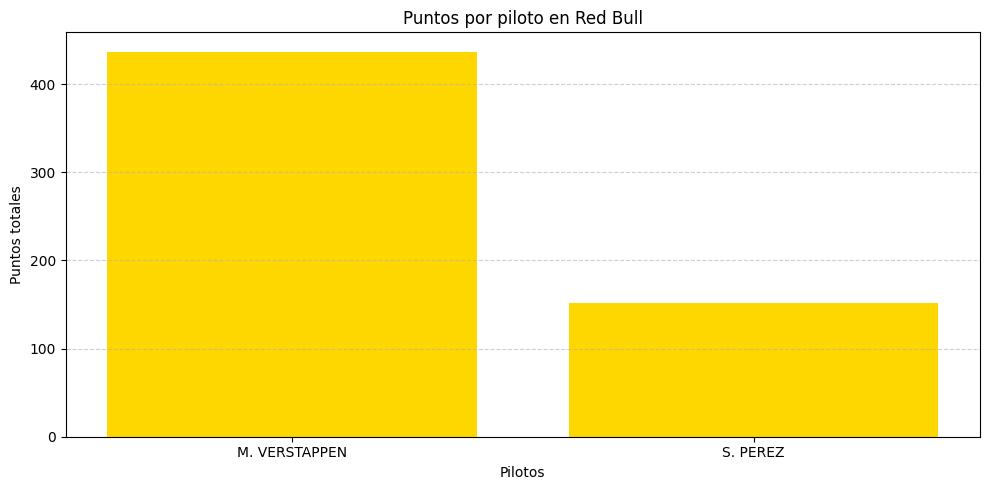

In [ ]:
# Importamos la librería de visualización matplotlib
import matplotlib.pyplot as plt

# Aseguramos que las columnas de la 2 a la 25 (índices del 1 al 24) sean numéricas
# Esto es importante para poder hacer operaciones aritméticas como la suma
for col in datos_f1.columns[1:25]:
    datos_f1[col] = pd.to_numeric(datos_f1[col], errors='coerce')  # Convierte y pone NaN si hay errores
    # Intenta convertir todos los valores de la columna a tipo numérico.
    # Si encuentra algo que no se puede convertir (por ejemplo, una palabra o símbolo), lo reemplaza por NaN (valor nulo), gracias al parámetro errors='coerce'

# Calculamos los puntos totales por piloto sumando sus resultados en cada carrera (columnas 2 a 25)
puntos_totales = []  # Lista vacía para almacenar la suma de puntos por piloto
for i in range(len(datos_f1)):  # Iteramos sobre todas las filas
    suma = 0
    for j in range(1, 25):  # Recorremos las columnas de la 2 a la 25
        valor = datos_f1.iloc[i, j]  # Obtenemos el valor de cada celda
        if not pd.isna(valor):  # Verificamos que no sea NaN
            suma += valor  # Acumulamos la suma
    puntos_totales.append(suma)  # Agregamos la suma a la lista

# Creamos una nueva columna en el DataFrame llamada "Points" con el total de puntos calculados
datos_f1["Points"] = puntos_totales

# Pedimos al usuario que ingrese el nombre de una escudería y convertimos el texto a minúsculas para comparar
busqueda_3 = input("Escribe el nombre de la escudería: ").lower()

# Creamos dos listas para almacenar los nombres de pilotos y sus puntos si pertenecen a esa escudería
nombres = []
puntos = []

# Recorremos el DataFrame para buscar pilotos que pertenezcan a la escudería buscada
for i in range(len(datos_f1)):
    escuderia = datos_f1.loc[i, "Car"]  # Accedemos a la columna que indica la escudería del piloto
    if not pd.isna(escuderia):  # Verificamos que no sea NaN
        if str(escuderia).lower() == busqueda_3:  # Comparamos la escudería con la búsqueda del usuario
            piloto = datos_f1.loc[i, "Drivers"]  # Obtenemos el nombre del piloto
            punto = datos_f1.loc[i, "Points"]  # Obtenemos sus puntos totales
            nombres.append(piloto)  # Agregamos a la lista
            puntos.append(punto)

# Si encontramos pilotos para esa escudería, graficamos sus puntos
if len(nombres) > 0:
    plt.figure(figsize=(10, 5))  # Tamaño del gráfico
    plt.bar(nombres, puntos, color='gold')  # Gráfico de barras con pilotos y puntos
    plt.title(f"Puntos por piloto en {busqueda_3.title()}")  # Título con el nombre capitalizado
    plt.xlabel("Pilotos")  # Etiqueta del eje x
    plt.ylabel("Puntos totales")  # Etiqueta del eje y
    plt.xticks(rotation=0)  # Rotación de etiquetas del eje x
    plt.grid(axis='y', linestyle='--', alpha=0.6)  # Líneas de guía horizontales
    plt.tight_layout()  # Ajuste automático del diseño
    plt.show()  # Mostrar el gráfico
else:
    # Si no se encontró ningún piloto, mostrar mensaje de aviso
    print("No se encontraron pilotos para esa escudería.")


---
## **2. Librería Folium**

### **¿Qué es folium?**

**folium** es una librería de Python que permite crear mapas interactivos basados en Leaflet.js, una potente librería JavaScript de código abierto para mapas.

Te permite visualizar datos geográficos fácilmente en notebooks como Jupyter o Google Colab, y agregar marcadores, colores, círculos, capas de calor, etc., todo usando solo Python.

### **¿Para qué sirve folium?**

* Crear mapas con marcadores y pop-ups.

* Visualizar datos georreferenciados desde un DataFrame.

* Mostrar rutas, ubicaciones, densidades (heatmaps), regiones coloreadas, etc.

https://python-visualization.github.io/folium/latest/getting_started.html

https://peter-hoffmann.com/2022/beautiful-leaflet-markers-with-folium-and-fontawesome.html

In [ ]:
# Creamos un  diccionario con las coordenadas ([latitud, longitud]) de la ubicación de los países a los que pertenece cada piloto
# OJO: existe varios pilotos que comparten misma nacionalidad, así solo se crea una clave única con el país
# ya cuando se unifique al df las coordenadas se mostraran en cada piloto que comparta la misma nacionalidad
coordenadas_por_nacionalidad = {
    "Países Bajos": [52.1326, 5.2913],
    "Reino Unido": [55.3781, -3.4360],
    "Mónaco": [43.7384, 7.4246],
    "Australia": [-25.2744, 133.7751],
    "España": [40.4637, -3.7492],
    "México": [23.6345, -102.5528],
    "Francia": [46.2276, 2.2137],
    "Alemania": [51.1657, 10.4515],
    "Japón": [36.2048, 138.2529],
    "Dinamarca": [56.2639, 9.5018],
    "Tailandia": [15.8700, 100.9925],
    "Argentina": [-38.4161, -63.6167],
    "China": [35.8617, 104.1954],
    "Nueva Zelanda": [-40.9006, 174.8860],
    "Finlandia": [61.9241, 25.7482],
    "Estados Unidos": [37.0902, -95.7129]
}

In [ ]:
# Convertimos 'coordenadas_por_nacionalidad' (un diccionario) en un DataFrame
# Cada clave del diccionario será una fila, y sus valores serán las columnas
df_info_2 = pd.DataFrame.from_dict(coordenadas_por_nacionalidad, orient='index')

# Establecemos el nombre del índice como 'Country' para que coincida con la columna en 'datos_f1'
df_info_2.index.name = 'Country'

# Restablecemos el índice para convertir 'Country' en una columna normal (en lugar de índice)
df_info_2.reset_index(inplace=True)

# Hacemos un merge (unión) entre el DataFrame 'datos_f1' y 'df_info_2' usando la columna 'Country'
# El tipo de unión es 'left', lo que significa que se mantendrán todas las filas de 'datos_f1'
# y se agregarán las coordenadas solo si hay coincidencia con 'Country'
datos_f1_final = datos_f1.merge(df_info_2, on='Country', how='left')


In [ ]:
# Mostramos el df
datos_f1_final

,Drivers,BHR,SAU,AUS,JPN,CHN,MIA,ERO,MCO,CAN,...,SAO,VEG,QAT,ABD,Car,Country,Link,Points,0,1
0,M. VERSTAPPEN,26,25,0,26,33,26,25,8,25,...,31,10,26,8,Red Bull,Países Bajos,https://cdn-5.motorsport.com/images/mgl/6D1Xbe...,437,52.1326,5.2913
1,L. NORRIS,8,4,15,10,21,25,18,12,18,...,16,9,9,25,McLaren,Reino Unido,https://media.formula1.com/image/upload/f_auto...,374,55.3781,-3.4360
2,C. LECLERC,12,16,19,12,17,22,15,25,0,...,16,12,22,15,Ferrari,Mónaco,https://soymotor.com/sites/default/files/2025-...,356,43.7384,7.4246
3,O. PIASTRI,4,12,12,4,6,3,12,18,10,...,11,6,23,1,McLaren,Australia,https://media.formula1.com/image/upload/f_auto...,292,-25.2744,133.7751
4,C. SAINZ,15,0,25,15,14,14,10,15,0,...,4,15,13,18,Ferrari,España,https://imageio.forbes.com/specials-images/ima...,290,40.4637,-3.7492
5,G. RUSSELL,10,8,0,6,9,4,7,10,15,...,15,25,18,10,Mercedes,Reino Unido,https://cdn-8.motorsport.com/images/mgl/Y998Zb...,245,55.3781,-3.4360
6,L. HAMILTON,6,2,0,2,9,8,8,7,13,...,1,18,3,12,Mercedes,Reino Unido,https://demaskosports.com/cdn/shop/files/2024_...,223,55.3781,-3.4360
7,S. PEREZ,18,18,10,18,21,18,4,0,0,...,1,1,0,0,Red Bull,México,https://soymotor.com/sites/default/files/2024-...,152,23.6345,-102.5528
8,F. ALONSO,2,10,4,8,7,2,0,0,8,...,6,2,0,0,Aston Martin,España,https://cdn-9.motorsport.com/images/mgl/0ZRQbb...,70,40.4637,-3.7492
9,P. GASLY,0,0,0,0,0,0,1,2,2,...,6,0,0,0,Alpine,Francia,https://soymotor.com/sites/default/files/2025-...,42,46.2276,2.2137


In [ ]:
# Renombramos las columnas que originalmente se llamaban 0 y 1 (por ser valores sin nombre en el diccionario)
# Les damos nombres más descriptivos: 'Latitude' para la columna 0 y 'Longitude' para la columna 1
datos_f1_final = datos_f1_final.rename(columns={0: 'Latitude', 1: 'Longitude'})

# Mostramos el DataFrame resultante con las columnas ya renombradas
datos_f1_final

,Drivers,BHR,SAU,AUS,JPN,CHN,MIA,ERO,MCO,CAN,...,SAO,VEG,QAT,ABD,Car,Country,Link,Points,Latitude,Longitude
0,M. VERSTAPPEN,26,25,0,26,33,26,25,8,25,...,31,10,26,8,Red Bull,Países Bajos,https://cdn-5.motorsport.com/images/mgl/6D1Xbe...,437,52.1326,5.2913
1,L. NORRIS,8,4,15,10,21,25,18,12,18,...,16,9,9,25,McLaren,Reino Unido,https://media.formula1.com/image/upload/f_auto...,374,55.3781,-3.4360
2,C. LECLERC,12,16,19,12,17,22,15,25,0,...,16,12,22,15,Ferrari,Mónaco,https://soymotor.com/sites/default/files/2025-...,356,43.7384,7.4246
3,O. PIASTRI,4,12,12,4,6,3,12,18,10,...,11,6,23,1,McLaren,Australia,https://media.formula1.com/image/upload/f_auto...,292,-25.2744,133.7751
4,C. SAINZ,15,0,25,15,14,14,10,15,0,...,4,15,13,18,Ferrari,España,https://imageio.forbes.com/specials-images/ima...,290,40.4637,-3.7492
5,G. RUSSELL,10,8,0,6,9,4,7,10,15,...,15,25,18,10,Mercedes,Reino Unido,https://cdn-8.motorsport.com/images/mgl/Y998Zb...,245,55.3781,-3.4360
6,L. HAMILTON,6,2,0,2,9,8,8,7,13,...,1,18,3,12,Mercedes,Reino Unido,https://demaskosports.com/cdn/shop/files/2024_...,223,55.3781,-3.4360
7,S. PEREZ,18,18,10,18,21,18,4,0,0,...,1,1,0,0,Red Bull,México,https://soymotor.com/sites/default/files/2024-...,152,23.6345,-102.5528
8,F. ALONSO,2,10,4,8,7,2,0,0,8,...,6,2,0,0,Aston Martin,España,https://cdn-9.motorsport.com/images/mgl/0ZRQbb...,70,40.4637,-3.7492
9,P. GASLY,0,0,0,0,0,0,1,2,2,...,6,0,0,0,Alpine,Francia,https://soymotor.com/sites/default/files/2025-...,42,46.2276,2.2137


---

In [ ]:
# Creamos un diccionario de coordenadas

coordenadas_ciudades = {
    'Cuzco': [-13.53195, -71.96746],
    'Ayacucho': [-13.15878, -74.22321]
}

In [ ]:
# Importamos la librería folium, que sirve para crear mapas interactivos
import folium

# Creamos un mapa centrado en un punto medio aproximado entre Cuzco y Ayacucho
# La opción zoom_start define qué tan "cerca" o "lejos" empieza el mapa (7 es un buen nivel regional)
mapa = folium.Map(location=[-13.35, -73.1], zoom_start=7)

# Recorremos el diccionario para agregar un marcador por cada ciudad
for ciudad, coords in coordenadas_ciudades.items():
    folium.Marker(
        location=coords,         # Coordenadas de la ciudad
        popup=ciudad,            # Texto que aparece al hacer clic en el marcador
        icon=folium.Icon(color='red', icon='info-sign')  # Estilo del ícono del marcador
    ).add_to(mapa)  # Agregamos el marcador al mapa

# Mostramos el mapa interactivo (solo se visualiza correctamente en Jupyter o Colab)
mapa


In [ ]:
# Crear un mapa centrado entre Cuzco y Ayacucho
# Se usa una latitud y longitud intermedia aproximada
# zoom_start define el nivel de acercamiento (7 es nivel regional)
mapa_2 = folium.Map(location=[-13.35, -73.1], zoom_start=7)

# Agregar un marcador para cada ciudad usando sus coordenadas
for ciudad, coords in coordenadas_ciudades.items():
    folium.Marker(
        location=coords,  # Coordenadas de la ciudad
        popup=ciudad,     # Texto emergente que aparece al hacer clic
        icon=folium.Icon(color='blue', icon='info-sign')  # Ícono azul con símbolo de información
    ).add_to(mapa_2)  # Agrega el marcador al mapa

# Dibujar una línea entre Cuzco y Ayacucho
# PolyLine traza una línea entre las coordenadas dadas
linea = folium.PolyLine(
    locations=[coordenadas_ciudades['Cuzco'], coordenadas_ciudades['Ayacucho']],  # Lista de puntos
    color='red',     # Color de la línea
    weight=3,        # Grosor de la línea en píxeles
    opacity=0.8      # Transparencia de la línea (1 = opaca)
).add_to(mapa_2)     # Agrega la línea al mapa

# Mostrar el mapa interactivo (funciona en entornos como Jupyter o Colab)
mapa_2


---

In [ ]:
# Importamos la librería folium para crear mapas interactivos
import folium

# Creamos el mapa base con una vista global inicial
# location define el centro del mapa (latitud 20, longitud 0)
# zoom_start define el nivel de zoom inicial (2 = vista muy amplia)
m = folium.Map(location=[20, 0], zoom_start=2)

# Agrupamos el DataFrame 'datos_f1_final' por la columna "Country"
# Esto nos permite procesar los datos país por país
agrupado = datos_f1_final.groupby("Country")

# Iteramos sobre cada grupo (país) y su correspondiente sub-DataFrame
for pais, grupo in agrupado:
    # Tomamos la latitud y longitud del primer registro del país (suponemos que es igual para todo el grupo)
    lat = grupo["Latitude"].iloc[0]
    lon = grupo["Longitude"].iloc[0]

    # Comprobamos que las coordenadas no sean nulas
    if pd.notna(lat) and pd.notna(lon):
        # Creamos un string HTML para el contenido emergente (popup)
        # Incluye la lista de pilotos y sus escuderías de ese país
        # Inicializamos una cadena vacía para acumular el contenido del popup
        contenido = ""

        # Recorremos cada fila del grupo (pilotos de un mismo país)
        for _, fila in grupo.iterrows():
            # Añadimos a 'contenido' el nombre del piloto en negrita y su escudería,
            # seguido de un salto de línea HTML (<br>) para separar cada piloto
            contenido += f"<b>{fila['Drivers']}</b> - {fila['Car']}<br>"
        # Agregamos un marcador en las coordenadas del país
        folium.Marker(
            location=[lat, lon],                   # Coordenadas del marcador
            popup=folium.Popup(contenido, max_width=300),  # Popup con información en HTML
            icon=folium.Icon(color='blue', icon='user')    # Ícono azul con forma de usuario
        ).add_to(m)

# Finalmente, mostramos el mapa interactivo con todos los marcadores agregados
m


---
## **3. Librería plotly.express**

https://plotly.com/python/plotly-express/


**Plotly Express** es una librería de visualización de datos en Python que forma parte de Plotly. Está diseñada para crear gráficos interactivos de forma sencilla y rápida con pocas líneas de código.

Características principales de Plotly Express:
* Fácil de usar: Permite generar gráficos complejos con funciones simples y argumentos claros

* Gráficos interactivos: Los gráficos creados permiten zoom, desplazamiento, pasar el cursor para ver detalles, entre otras interacciones.

* Integración con pandas: Trabaja directamente con DataFrames, facilitando la manipulación y visualización de datos tabulares.



In [ ]:
# Importamos plotly.express para crear gráficos interactivos de forma sencilla
import plotly.express as px

# Contamos cuántos pilotos hay por cada nacionalidad (país)
# 'value_counts' devuelve la frecuencia de cada valor en la columna 'Country'
# 'reset_index' convierte la serie resultante en un DataFrame
nacionalidades = datos_f1_final['Country'].value_counts().reset_index()

# Renombramos las columnas para mayor claridad
nacionalidades.columns = ['Country', 'Cantidad']

# Creamos un gráfico de torta (pie chart) con plotly express
fig = px.pie(
    nacionalidades,           # Datos de entrada (DataFrame)
    names='Country',          # La categoría que define las porciones (países)
    values='Cantidad',        # Tamaño de cada porción (cantidad de pilotos)
    title='Distribución de pilotos por nacionalidad',  # Título del gráfico
    color_discrete_sequence=px.colors.qualitative.Pastel  # Paleta de colores pastel para las porciones
)

# Actualizamos las trazas para mostrar etiquetas dentro del gráfico
# 'textposition' define la posición del texto (dentro)
# 'textinfo' muestra el porcentaje y la etiqueta (nombre del país)
fig.update_traces(textposition='inside', textinfo='percent+label')

# Mostramos el gráfico interactivo
fig.show()


In [ ]:
# Definimos el nombre del piloto a buscar (asegúrate que coincida exactamente con el DataFrame)
nombre_piloto = 'M. VERSTAPPEN'

# Filtramos el DataFrame para obtener solo las filas correspondientes a Max Verstappen
verstappen = datos_f1_final[datos_f1_final['Drivers'] == nombre_piloto]

# Paleta de colores pastel para usar en el gráfico
colores = px.colors.qualitative.Pastel

# Verificamos que la búsqueda haya encontrado resultados (que el DataFrame no esté vacío)
if not verstappen.empty:
    # Seleccionamos las columnas 1 a 25 (puntos por carrera) de la primera fila encontrada
    puntos_carreras = verstappen.iloc[0, 1:25]  # columnas índice 1 a 24 inclusive

    # Convertimos esta serie en un DataFrame para facilitar la graficación
    df_hist = puntos_carreras.reset_index()

    # Renombramos las columnas para claridad: 'Carrera' (nombre original de la columna) y 'Puntos'
    df_hist.columns = ['Carrera', 'Puntos']

    # Creamos un histograma con Plotly Express para mostrar la distribución de puntos por carrera
    fig = px.histogram(
        df_hist,                   # Datos
        x='Puntos',                # Variable para el eje x
        nbins=17,                  # Número de bins para el histograma (una barra por posible puntaje)
        title='Histograma de puntos por carrera de Max Verstappen',  # Título del gráfico
        labels={'Puntos': 'Puntos obtenidos'},   # Etiqueta del eje x
        opacity=0.75,              # Transparencia de las barras
        color='Puntos',            # Colorear barras según el valor de puntos
        color_discrete_sequence=colores  # Paleta de colores pastel
    )

    # Mostramos el gráfico interactivo
    fig.show()

else:
    # Mensaje en caso no se encuentre el piloto con el nombre indicado
    print(f"No se encontró al piloto '{nombre_piloto}'. Revisa el nombre en la columna 'Drivers'.")


In [ ]:
# Contar cuántos pilotos hay en cada escudería
# 'value_counts' cuenta la frecuencia de cada valor en la columna 'Car' (escudería)
# 'reset_index' convierte esa serie en un DataFrame
conteo = datos_f1_final['Car'].value_counts().reset_index()

# Renombrar las columnas para que sean más descriptivas
conteo.columns = ['Escuderías', '# pilotos']

# Seleccionar una paleta de colores pastel para el gráfico (colores discretos para categorías)
colores = px.colors.qualitative.Pastel

# Crear un gráfico de barras con Plotly Express
# - eje x: nombre de las escuderías
# - eje y: cantidad de pilotos por escudería
# - color: asigna un color distinto a cada barra según la escudería
fig = px.bar(
    conteo,
    x='Escuderías',
    y='# pilotos',
    title='Cantidad de pilotos por escudería 2024',
    color='Escuderías',
    color_discrete_sequence=colores
)

# Mostrar el gráfico interactivo
fig.show()
